# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-25 09:00:06.781317


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/24/20


,10/24/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,8575177,224889,2.62
Brazil,5380635,156903,2.92
India,7864811,118534,1.51
Mexico,886800,88743,10.01
United Kingdom,857043,44835,5.23
Italy,504509,37210,7.38
Spain,1046132,34752,3.32


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/24/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
48195,US,8407702,2020-10-22,223032.0,856.0,71671.0,61141.857143
48194,US,8336031,2020-10-21,222176.0,1124.0,62735.0,59990.285714
48193,US,8273296,2020-10-20,221052.0,933.0,60315.0,59527.285714
48192,US,8212981,2020-10-19,220119.0,445.0,58387.0,58397.428571
48191,US,8154594,2020-10-18,219674.0,388.0,48210.0,56006.857143
48190,US,8106384,2020-10-17,219286.0,711.0,57519.0,55493.142857
48189,US,8048865,2020-10-16,218575.0,883.0,69156.0,55081.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/24/20


,10/24/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,493832,33418.0,6.77
Texas,888362,17915.0,2.02
California,903684,17343.0,1.92
Florida,776251,16417.0,2.11
New Jersey,227339,16281.0,7.16
Massachusetts,149488,9839.0,6.58
Illinois,374901,9751.0,2.60


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/24/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1659,California,893364,2020-10-22,17256.0,89.0,6425.0,3602.285714
1658,California,886939,2020-10-21,17167.0,112.0,3193.0,3105.000000
1657,California,883746,2020-10-20,17055.0,73.0,4101.0,3205.142857
1656,California,879645,2020-10-19,16982.0,3.0,3953.0,3104.571429
1655,California,875692,2020-10-18,16979.0,23.0,2078.0,2928.857143
1654,California,873614,2020-10-17,16956.0,46.0,2361.0,3029.142857
1653,California,871253,2020-10-16,16910.0,78.0,3105.0,3168.142857


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/24/20


,10/24/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,298937,6989.0,2.34
Orange,58326,1444.0,2.48
Riverside,65757,1279.0,1.95
San Bernardino,62353,1072.0,1.72
San Diego,54314,868.0,1.60
San Joaquin,21630,489.0,2.26
Sacramento,25264,484.0,1.92


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/24/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5260,Los Angeles,294065,2020-10-22,6956.0,12.0,3579.0,1126.000000
5259,Los Angeles,290486,2020-10-21,6944.0,32.0,477.0,781.428571
5258,Los Angeles,290009,2020-10-20,6912.0,35.0,643.0,894.142857
5257,Los Angeles,289366,2020-10-19,6877.0,1.0,915.0,912.000000
5256,Los Angeles,288451,2020-10-18,6876.0,13.0,315.0,902.285714
5255,Los Angeles,288136,2020-10-17,6863.0,8.0,914.0,995.857143
5254,Los Angeles,287222,2020-10-16,6855.0,21.0,1039.0,1044.714286
5253,Los Angeles,286183,2020-10-15,6834.0,22.0,1167.0,1074.000000
5252,Los Angeles,285016,2020-10-14,6812.0,22.0,1266.0,1081.571429
5251,Los Angeles,283750,2020-10-13,6790.0,17.0,768.0,1127.714286



7 day new US cases as of 10/24/20


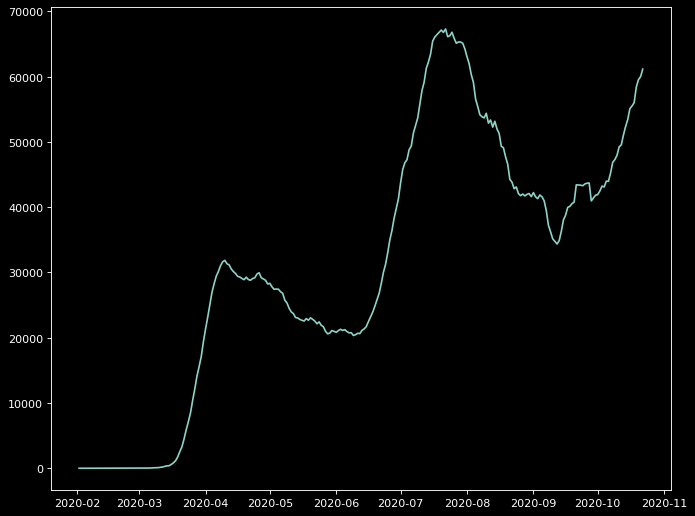

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/24/20


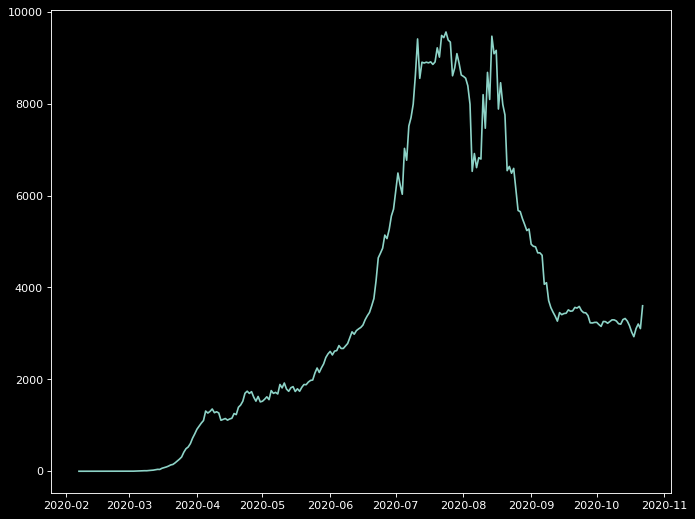

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/24/20


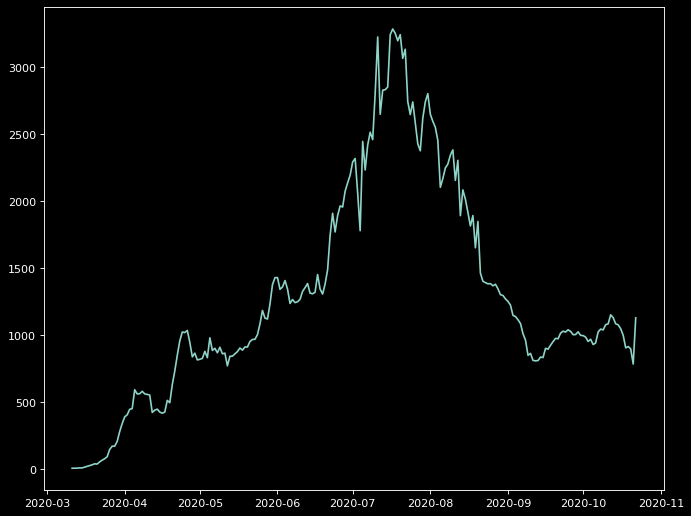

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()